In [2]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving mushrooms.csv to mushrooms (1).csv


In [3]:
df = pd.read_csv("mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [1]:
!pip install shap
!pip install pycaret
!pip install markupsafe==2.0.1 Jinja2


  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-nvrtc-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-runtime-cu12==12.4.127; platform_system == "Linux" and pla

In [4]:
import shap
import pycaret
from pycaret.classification import *

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

lble = LabelEncoder()
df_enc = df.apply(lble.fit_transform)



In [16]:
y1 = df_enc['class']
x1 = df_enc.drop(columns=['class'])
model1 = DecisionTreeClassifier()
model1.fit(x1,y1)



DecisionTreeClassifier()

In [11]:
df1 = pd.read_csv('mushrooms_test_dataset.csv')
df1

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,b,f,y,t,p,a,w,n,b,...,k,o,o,p,o,n,f,b,v,u
1,p,f,y,c,t,f,a,c,n,h,...,s,c,p,p,w,n,f,r,a,u
2,p,b,s,w,t,s,f,c,b,g,...,k,p,g,p,n,n,n,w,c,p
3,p,c,s,r,f,n,f,c,b,u,...,s,o,e,p,y,n,l,k,v,d
4,p,x,s,n,t,s,a,w,b,g,...,y,n,y,p,o,t,p,b,v,m
5,e,f,f,n,t,f,a,c,b,o,...,y,p,n,p,y,t,f,r,v,m
6,e,k,f,u,f,f,a,w,n,k,...,s,w,y,p,w,n,f,b,y,p
7,e,x,y,u,f,l,f,w,n,r,...,f,c,n,p,n,t,n,k,a,u
8,p,k,y,u,f,n,f,c,n,u,...,f,n,e,p,w,o,f,y,c,p
9,p,k,f,g,f,a,a,c,n,u,...,s,y,b,p,n,n,l,n,n,g


We are now going to train a DecisionTree and a RandomForest model on this random and challenging generated dataset.


In [21]:
le2 = LabelEncoder()
df1_enc = df1.apply(le2.fit_transform)

y_test1 = df1_enc['class']
x_test1 = df1_enc.drop(columns=['class'])

In [22]:
pred1 = model1.predict(x_test1)

print(f"Accuracy: {accuracy_score(y_test1,pred1)}")
print(f"Classification Report: {classification_report(y_test1,pred1)}")

Accuracy: 0.36
Classification Report:               precision    recall  f1-score   support

           0       0.40      0.46      0.43        13
           1       0.30      0.25      0.27        12

    accuracy                           0.36        25
   macro avg       0.35      0.36      0.35        25
weighted avg       0.35      0.36      0.35        25



In [19]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=10, criterion="gini",random_state=22)
model2.fit(x1,y1)


RandomForestClassifier(n_estimators=10, random_state=22)

In [23]:
pred2 = model2.predict(x_test1)

print(f"Accuracy: {accuracy_score(y_test1,pred2)}")
print(f"Classification Report: {classification_report(y_test1,pred2)}")

Accuracy: 0.6
Classification Report:               precision    recall  f1-score   support

           0       0.59      0.77      0.67        13
           1       0.62      0.42      0.50        12

    accuracy                           0.60        25
   macro avg       0.61      0.59      0.58        25
weighted avg       0.61      0.60      0.59        25



  0%|          | 0/25 [00:00<?, ?it/s]

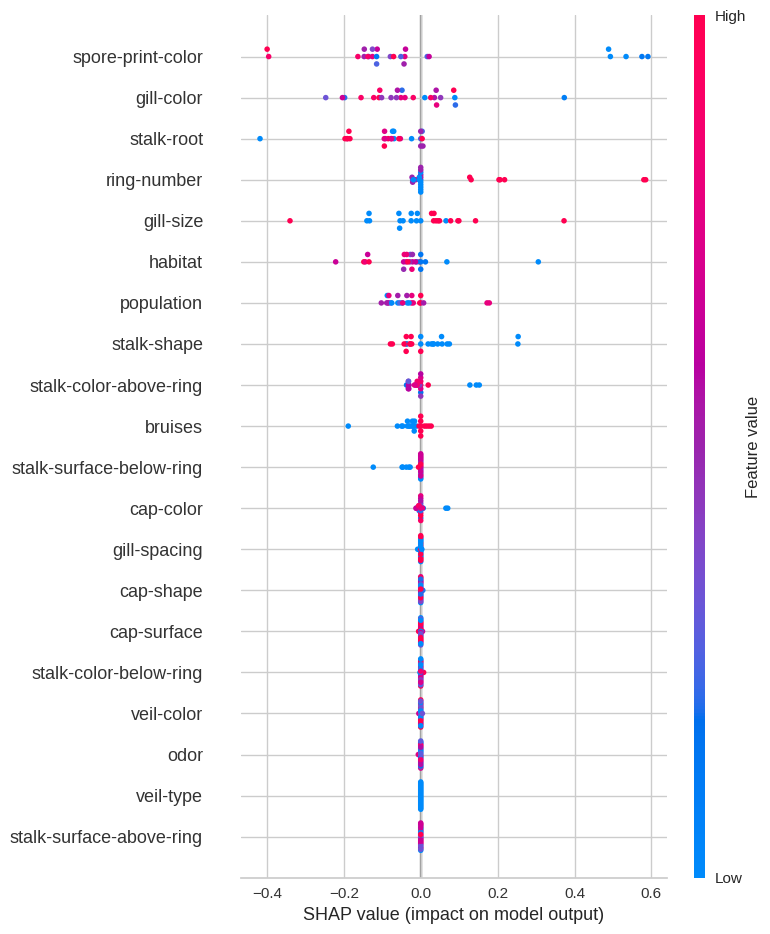

In [24]:
#Lastly, we are going to perform a shapley analysis on the original dataset to understand about the correlations
ex = shap.KernelExplainer(model1.predict, shap.sample(x1,100))
shap.initjs()
shap_values = ex.shap_values(x_test1)
shap.summary_plot(shap_values, x_test1)



  0%|          | 0/25 [00:00<?, ?it/s]

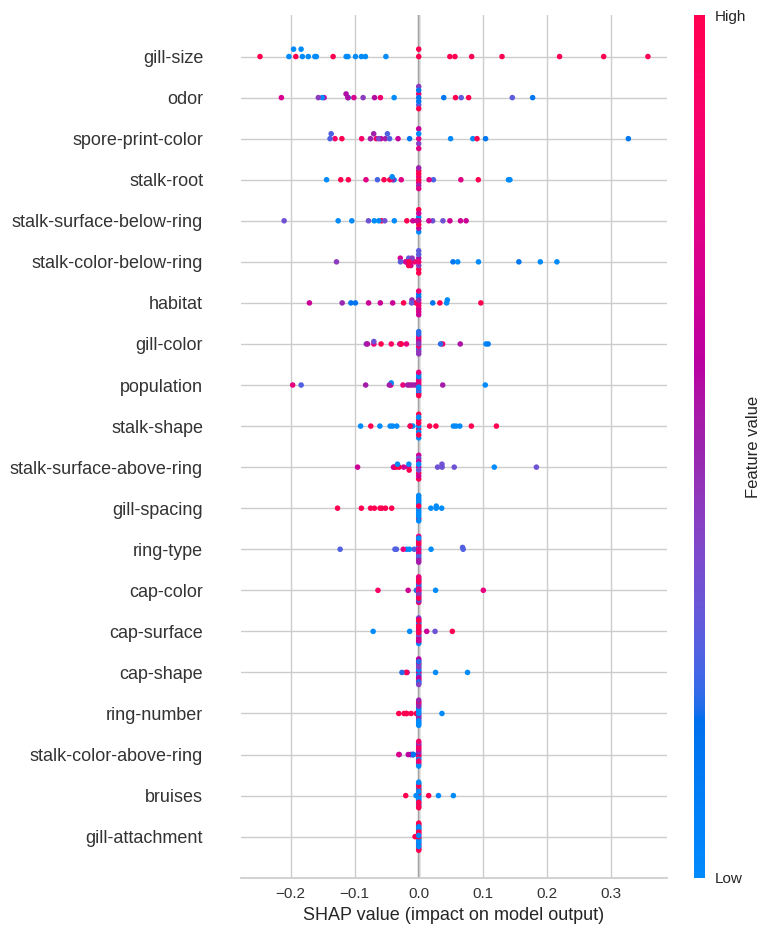

In [25]:
# Now, for the second model

ex2 = shap.KernelExplainer(model2.predict, shap.sample(x1,100))
shap.initjs()
shap_values2 = ex2.shap_values(x_test1)
shap.summary_plot(shap_values2, x_test1)